In [1]:
dir_root = '.'
# If using google colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive/')
    dir_root = '/content/drive/MyDrive/Colab Notebooks/ESE546/hw3'

print(dir_root)

.


In [2]:
import requests

# Load the text from a local file
def load_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Load the text from a URL
def load_text_from_url(url):
    response = requests.get(url)
    text = response.text.replace('\r\n', '\n')  # Normalize line endings
    return text

# Count unique characters in the text
def count_unique_chars(text):
    unique_chars = set(text)
    # Num of unique characters
    vocab_size = len(unique_chars)
    return vocab_size, unique_chars

# List of file paths or URLs
local_file_1 = 'pg100.txt'
local_file_2 = 'pg2600.txt'
local_file_3 = 'pg766.txt'
url_file_1 = 'https://www.gutenberg.org/cache/epub/100/pg100.txt'
url_file_2 = 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt'
url_file_3 = 'https://www.gutenberg.org/cache/epub/766/pg766.txt'

if 'google.colab' in str(get_ipython()):
    file_path_list = [url_file_1, url_file_2, url_file_3]
else:
    file_path_list = [local_file_1, local_file_2, local_file_3]
text_list = []
vocab_size_list = []
unique_chars_list = []

for file_path in file_path_list:
    if file_path.startswith('http'):
        print(f'Loading text from URL: {file_path}')
        text = load_text_from_url(file_path)
    else:
        print(f'Loading text from file: {file_path}')
        text = load_text_from_file(file_path)
    vocab_size, unique_chars = count_unique_chars(text)
    text_list.append(text)
    vocab_size_list.append(vocab_size)
    unique_chars_list.append(unique_chars)

print(f'Vocabulary size for each text: {vocab_size_list}')
print(f'Unique characters for each text: {unique_chars_list}')

Loading text from file: pg100.txt
Loading text from file: pg2600.txt
Loading text from file: pg766.txt
Vocabulary size for each text: [107, 112, 90]
Unique characters for each text: [{'Ç', 'i', 'd', 'b', '#', '%', 'Y', '8', '\ufeff', '\n', 'ç', 'G', 'C', 'q', 'B', 'y', '“', '”', ' ', '7', 'c', '—', '.', 'a', 'N', ',', 'H', 'k', '5', ']', 'D', 'f', '9', 'R', 'o', 'g', '…', 'P', 'S', 'L', 'p', 'm', 'À', '4', 'I', '0', ';', 'Q', '™', 'K', 'r', '[', 'â', 'î', 'v', 'n', '’', 'U', 'X', 'T', '!', '/', ')', 'M', '?', 'A', 'E', 'O', 'x', 'l', "'", 'Æ', '\t', 'Z', '&', 'u', 'F', 'h', '6', 'e', '2', '(', 's', 'J', 'W', '$', 't', 'à', '_', ':', 'è', 'æ', 'ë', '•', 'j', '3', 'ê', '-', '1', 'w', 'z', 'V', '*', 'É', '‘', 'é', 'œ'}, {'i', 'd', 'b', '#', '%', 'Y', 'ý', '8', '\ufeff', '\n', 'ç', 'G', 'C', 'q', 'B', 'y', 'ó', '“', '”', ' ', '7', 'c', '—', '.', 'a', 'N', '=', ',', 'H', 'k', '5', ']', 'D', 'f', '9', 'í', 'R', 'o', 'g', 'P', 'S', 'L', 'p', 'ä', 'm', 'À', '0', 'I', '4', ';', 'Q', '™', 'K', '

In [3]:
print(text_list[0][:100])
print(text_list[1][:100])
print(text_list[2][:100])

The Project Gutenberg eBook of The Complete Works of William Shakespeare
    
This ebook is for the
﻿The Project Gutenberg eBook of War and Peace
    
This ebook is for the use of anyone anywhere in t
﻿The Project Gutenberg eBook of David Copperfield
    
This ebook is for the use of anyone anywhere 


In [4]:
# # Compare unique characters from local and URL text files
# local_file_path = 'pg2600.txt'
# url_file_path = 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt'
#
# local_text = load_text_from_file(local_file_path)
# local_vocab_size, local_unique_chars = count_unique_chars(local_text)
# url_text = load_text_from_url(url_file_path)
# url_vocab_size, url_unique_chars = count_unique_chars(url_text)
#
# # Find the extra character(s)
# extra_chars_in_url = url_unique_chars - local_unique_chars
# extra_chars_in_local = local_unique_chars - url_unique_chars
# print(f'Extra characters in URL text: {extra_chars_in_url}')
# print(f'Extra characters in local text: {extra_chars_in_local}')

In [5]:
# Create a dictionary to map characters to indices and vice-versa
def create_char_mappings(unique_chars):
    char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
    index_to_char = {idx: char for idx, char in enumerate(unique_chars)}
    return char_to_index, index_to_char

vocab_size, unique_chars = vocab_size_list[0], unique_chars_list[0]
char_to_index, index_to_char = create_char_mappings(unique_chars)

print(f"Character to index mapping for first text: {char_to_index}")
print(f"Index to character mapping for first text: {index_to_char}")

Character to index mapping for first text: {'Ç': 0, 'i': 1, 'd': 2, 'b': 3, '#': 4, '%': 5, 'Y': 6, '8': 7, '\ufeff': 8, '\n': 9, 'ç': 10, 'G': 11, 'C': 12, 'q': 13, 'B': 14, 'y': 15, '“': 16, '”': 17, ' ': 18, '7': 19, 'c': 20, '—': 21, '.': 22, 'a': 23, 'N': 24, ',': 25, 'H': 26, 'k': 27, '5': 28, ']': 29, 'D': 30, 'f': 31, '9': 32, 'R': 33, 'o': 34, 'g': 35, '…': 36, 'P': 37, 'S': 38, 'L': 39, 'p': 40, 'm': 41, 'À': 42, '4': 43, 'I': 44, '0': 45, ';': 46, 'Q': 47, '™': 48, 'K': 49, 'r': 50, '[': 51, 'â': 52, 'î': 53, 'v': 54, 'n': 55, '’': 56, 'U': 57, 'X': 58, 'T': 59, '!': 60, '/': 61, ')': 62, 'M': 63, '?': 64, 'A': 65, 'E': 66, 'O': 67, 'x': 68, 'l': 69, "'": 70, 'Æ': 71, '\t': 72, 'Z': 73, '&': 74, 'u': 75, 'F': 76, 'h': 77, '6': 78, 'e': 79, '2': 80, '(': 81, 's': 82, 'J': 83, 'W': 84, '$': 85, 't': 86, 'à': 87, '_': 88, ':': 89, 'è': 90, 'æ': 91, 'ë': 92, '•': 93, 'j': 94, '3': 95, 'ê': 96, '-': 97, '1': 98, 'w': 99, 'z': 100, 'V': 101, '*': 102, 'É': 103, '‘': 104, 'é': 105,

In [6]:
import numpy as np

# One-hot encode a character based on the character index
def one_hot_encode(char, char_to_index, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[char_to_index[char]] = 1
    return one_hot_vector

test_char_a = 'a'
one_hot_vector = one_hot_encode(test_char_a, char_to_index, vocab_size)
print(f"One-hot encoding for '{test_char_a}': {one_hot_vector}")

One-hot encoding for 'a': [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# Sample a short portion from the first book
sample_text_500 = text_list[0][60000:60500]
print(sample_text_500)

 ill:
Some in their hawks and hounds, some in their horse.
And every humour hath his adjunct pleasure,
Wherein it finds a joy above the rest,
But these particulars are not my measure,
All these I better in one general best.
Thy love is better than high birth to me,
Richer than wealth, prouder than garments’ costs,
Of more delight than hawks and horses be:
And having thee, of all men’s pride I boast.
  Wretched in this alone, that thou mayst take,
  All this away, and me most wretched make.


   


In [8]:
from tqdm import tqdm

# # Generate sequences of 32 characters and the next character as the target
# def generate_sequences(text, char_to_index, sequence_length=32, stride=1):
#     input_sequences = []
#     target_characters = []

#     # for i in range(0, len(text) - sequence_length, stride):
#     for i in tqdm(range(0, len(text) - sequence_length - 1, stride), desc="Generating sequences"):
#         input_seq = text[i:i+sequence_length]
#         # Target/next character
#         target_char = text[i+sequence_length]

#         # Convert input sequence to one-hot encoded vectors
#         input_seq_encoded = [one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq]
#         input_sequences.append(input_seq_encoded)

#         # One-hot encoding for the target character
#         target_char_encoded = one_hot_encode(target_char, char_to_index, len(char_to_index))
#         target_characters.append(target_char_encoded)

#     return np.array(input_sequences), np.array(target_characters)

# Generate sequences of 32 characters and the next 32 after stride length as the target
def generate_sequences(
    text, char_to_index, input_seq_len=32, target_seq_len=32, stride=16
):
    input_sequences = []
    target_sequences = []

    prevent_index_overflow = max(input_seq_len, target_seq_len + stride)

    for i in tqdm(range(0, len(text) - prevent_index_overflow, stride), desc="Generating sequences"):
        input_seq = text[i : i + input_seq_len]
        target_seq = text[i + stride : i + target_seq_len + stride]

        # Convert to one-hot encoded vectors
        input_seq_encoded = [
            one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq
        ]
        target_seq_encoded = [
            one_hot_encode(c, char_to_index, len(char_to_index)) for c in target_seq
        ]

        input_sequences.append(input_seq_encoded)
        target_sequences.append(target_seq_encoded)

    return np.array(input_sequences), np.array(target_sequences)

In [9]:
input_seqs, target_seqs = generate_sequences(sample_text_500, char_to_index, input_seq_len=32, target_seq_len=32, stride=2)
print(f"Input sequences shape: {input_seqs.shape}")
print(f"Target characters shape: {target_seqs.shape}")

# randomly pick a sample input and target sequence
idx = np.random.randint(0, input_seqs.shape[0])
sample_input_seq = input_seqs[idx]
sample_target_seq = target_seqs[idx]
print(sample_input_seq)
print(sample_target_seq)
# print the sequence mapped to characters
print(">Sample input sequence:")
print(''.join([index_to_char[np.argmax(char)] for char in sample_input_seq]))
print(">Sample target sequence:")
print(''.join([index_to_char[np.argmax(char)] for char in sample_target_seq]))

Generating sequences: 100%|██████████| 233/233 [00:00<00:00, 11783.88it/s]

Input sequences shape: (233, 32, 107)
Target characters shape: (233, 32, 107)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
>Sample input sequence:
ts,
Of more delight than hawks a
>Sample target sequence:
,
Of more delight than hawks and


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Device: {device}")

class CharRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, rnn_layers=1, device=device):
        super(CharRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.rnn_layers = rnn_layers
        self.device = device

        self.rnn = nn.RNN(self.input_size, self.hidden_size, num_layers=self.rnn_layers, nonlinearity='tanh', batch_first=True)
        self.fc = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, x, hidden):
        # batch_size = x.size(0)
        # hidden = self.init_hidden(batch_size)
        # hidden = hidden.to(self.device)

        out, hidden = self.rnn(x, hidden)
        out = out.contiguous().view(-1, self.hidden_size)
        out = self.fc(out)
        # return F.log_softmax(out, dim=1), hidden
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.rnn_layers, batch_size, self.hidden_size).to(device)

def repackage_hidden(hidden_layer):
    # Detach hidden states from their history
    if isinstance(hidden_layer, torch.Tensor):
        return hidden_layer.detach()
    else:
        return tuple(repackage_hidden(v) for v in hidden_layer)


Device: cuda


In [11]:
USE_ALL_BOOKS = False

if 'google.colab' in str(get_ipython()):
    USE_ALL_BOOKS = True

sequence_length = 32
stride = 1

if USE_ALL_BOOKS:
    # Load text and prepare data
    all_texts = ''.join(text_list)  # Concatenate all texts
    vocab_size, unique_chars = count_unique_chars(all_texts)
    char_to_index, index_to_char = create_char_mappings(unique_chars)
    print(f"Vocabulary size: {vocab_size}")
    input_seqs, target_seqs = generate_sequences(all_texts, char_to_index, input_seq_len=sequence_length, target_seq_len=sequence_length, stride=stride)
else:
    text = text_list[0]
    # sample only the first 1/100 of the text
    text = text[:len(text)//100]
    vocab_size, unique_chars = count_unique_chars(text)
    char_to_index, index_to_char = create_char_mappings(unique_chars)
    print(f"Vocabulary size: {vocab_size}")
    input_seqs, target_seqs = generate_sequences(text, char_to_index, input_seq_len=sequence_length, target_seq_len=sequence_length, stride=stride)

input_seqs = torch.tensor(input_seqs, dtype=torch.float32)
target_seqs = torch.tensor(target_seqs, dtype=torch.long)

input_seqs = input_seqs.to(device)
target_seqs = target_seqs.to(device)
    
dataset = TensorDataset(input_seqs, target_seqs)
train_size = int(0.8 * len(dataset))
train_dataset = TensorDataset(input_seqs[:train_size], target_seqs[:train_size])
val_dataset = TensorDataset(input_seqs[train_size:], target_seqs[train_size:])
    
print("Input seqs shape:", input_seqs.shape)
print("Target seqs shape:", target_seqs.shape)


Vocabulary size: 79


Generating sequences: 100%|██████████| 53753/53753 [00:02<00:00, 19048.07it/s]


Input seqs shape: torch.Size([53753, 32, 79])
Target seqs shape: torch.Size([53753, 32, 79])


In [12]:
def escape_sequence(seq):
    return seq
    # return seq.replace(' ', '\\s').replace('\n', '\\n')

# Randomly pick a sequence and target sequence
# convert them back to characters
# and check if the conversion is correct
sequence_idx = np.random.randint(0, len(input_seqs))
input_seq = input_seqs[sequence_idx]
target_seq = target_seqs[sequence_idx]

input_indices = torch.argmax(input_seq, dim=1).cpu().numpy()
input_chars = [index_to_char[idx] for idx in input_indices]
target_indices = torch.argmax(target_seq, dim=1).cpu().numpy()
target_chars = [index_to_char[idx] for idx in target_indices]

input_str = ''.join(input_chars)
target_str = ''.join(target_chars)
escaped_input_str = escape_sequence(input_str)
escaped_target_str = escape_sequence(target_str)

print(f">Input seq: \n{escaped_input_str}")
print(f">Target seq: \n{escaped_target_str}")

# Also find the sequence in the original txt ebooks
# and print the entire sequence with the next target character
for book_idx, text in enumerate(text_list):
    input_start_indices = [i for i in range(len(text)) if text.startswith(input_str, i)]
    for input_start_idx in input_start_indices:
        # Make sure the sequence is not at the end of the text
        if input_start_idx + len(input_str) + len(target_str) < len(text):
            # Extract the sequence and the next character
            excerpt = text[input_start_idx:input_start_idx + max(len(input_str), len(target_str) + stride)]
            escaped_excerpt = escape_sequence(excerpt)
            print(f">Found the sequence in book {book_idx + 1}, original complete sequence:")
            print(f"{escaped_excerpt}")

>Input seq: 
ruth:
  Hers by thy beauty tempt
>Target seq: 
uth:
  Hers by thy beauty tempti
>Found the sequence in book 1, original complete sequence:
ruth:
  Hers by thy beauty tempti


In [27]:
from IPython.display import clear_output
import torch.optim.lr_scheduler as lr_scheduler

# Hyperparameters
hidden_size = 256
learning_rate = 0.001
num_epochs = 100 if 'google.colab' in str(get_ipython()) else 20
batch_size = 32
rnn_layers = 1

from torch.utils.data import DataLoader, RandomSampler, BatchSampler

# Create samplers that allow replacement to ensure each batch has the same size
train_sampler = RandomSampler(train_dataset, replacement=True, num_samples=len(train_dataset))
val_sampler = RandomSampler(val_dataset, replacement=True, num_samples=len(val_dataset))

# Create batch samplers with the same batch size and drop the last batch
train_batch_sampler = BatchSampler(train_sampler, batch_size=batch_size, drop_last=True)
val_batch_sampler = BatchSampler(val_sampler, batch_size=batch_size, drop_last=True)

# Create DataLoader instances
train_loader = DataLoader(dataset=train_dataset, batch_sampler=train_batch_sampler)
val_loader = DataLoader(dataset=val_dataset, batch_sampler=val_batch_sampler)

In [28]:
# Initialize model, loss function, and optimizer
model = CharRNN(vocab_size, vocab_size, hidden_size, rnn_layers).to(device)
# criterion = nn.NLLLoss().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Adjust gamma as needed

training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []
update_counts = []
update_cnt = 0

# Training loop
for epoch in tqdm(range(num_epochs), desc="Training"):
    total_loss = 0
    hidden = model.init_hidden(batch_size).to(device)
    for input_seqs, target_seqs in train_loader:
        model.train()
        batch_size = input_seqs.size(0)
        input_seqs, target_seqs = input_seqs.to(device), target_seqs.to(device)
        
        optimizer.zero_grad()
        hidden = repackage_hidden(hidden)
        output, hidden = model(input_seqs, hidden)
        loss = criterion(output, torch.argmax(target_seqs, dim=2).view(-1))
        loss.backward(retain_graph=True)
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        total_loss += loss.item()

        # Record training loss and accuracy every 100 updates
        if update_cnt % 100 == 0:
            training_losses.append(loss.item())
            update_counts.append(update_cnt)

            training_accuracy = (torch.argmax(output[-1, :]) == torch.argmax(target_seqs[:, -1, :], dim=1)).float().mean().item()
            training_accuracies.append(training_accuracy)

        if update_cnt % 1000 == 0:
            # Validation
            model.eval()
            with torch.no_grad():
                val_loss = 0
                correct_predictions = 0
                total_predictions = 0
                for input_seqs, target_seqs in val_loader:
                    batch_size = input_seqs.size(0)
                    input_seqs, target_seqs = input_seqs.to(device), target_seqs.to(device)
                    hidden = model.init_hidden(batch_size).to(device)
                    hidden = repackage_hidden(hidden)
                    output, hidden = model(input_seqs, hidden)
                    val_loss += criterion(output, torch.argmax(target_seqs, dim=2).view(-1)).item()
                    
                    correct_predictions += (torch.argmax(output[-1, :]) == torch.argmax(target_seqs[:, -1, :], dim=1)).sum().item()
                    total_predictions += target_seqs.size(0)

            avg_val_loss = val_loss / len(val_loader)
            validation_losses.append(avg_val_loss)
            validation_accuracy = correct_predictions / total_predictions
            validation_accuracies.append(validation_accuracy)
        
            print(f'Update {update_cnt}, Training Loss: {loss}, Training Accuracy: {training_accuracy:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}')

        update_cnt += 1
    
    scheduler.step()
    

Training:   0%|          | 0/20 [00:00<?, ?it/s]

Update 0, Training Loss: 4.362167835235596, Training Accuracy: 0.0312, Validation Loss: 4.3080, Validation Accuracy: 0.0563
Update 1000, Training Loss: 1.8560113906860352, Training Accuracy: 0.2188, Validation Loss: 1.9691, Validation Accuracy: 0.1001


Training:   5%|▌         | 1/20 [00:05<01:49,  5.77s/it]

Update 2000, Training Loss: 1.6477773189544678, Training Accuracy: 0.0000, Validation Loss: 1.8698, Validation Accuracy: 0.0935


Training:  10%|█         | 2/20 [00:10<01:36,  5.36s/it]

Update 3000, Training Loss: 1.4720574617385864, Training Accuracy: 0.0312, Validation Loss: 1.8896, Validation Accuracy: 0.1021


Training:  15%|█▌        | 3/20 [00:16<01:31,  5.41s/it]

Update 4000, Training Loss: 1.3087748289108276, Training Accuracy: 0.0625, Validation Loss: 1.9257, Validation Accuracy: 0.0856
Update 5000, Training Loss: 1.2368003129959106, Training Accuracy: 0.0938, Validation Loss: 1.9861, Validation Accuracy: 0.0846


Training:  20%|██        | 4/20 [00:21<01:23,  5.24s/it]

Update 6000, Training Loss: 0.9920271039009094, Training Accuracy: 0.0312, Validation Loss: 2.0343, Validation Accuracy: 0.0967


Training:  25%|██▌       | 5/20 [00:26<01:17,  5.15s/it]

Update 7000, Training Loss: 1.0621036291122437, Training Accuracy: 0.1875, Validation Loss: 2.0676, Validation Accuracy: 0.0966
Update 8000, Training Loss: 1.0307542085647583, Training Accuracy: 0.0938, Validation Loss: 2.1031, Validation Accuracy: 0.0949


Training:  30%|███       | 6/20 [00:31<01:13,  5.27s/it]

Update 9000, Training Loss: 1.09556245803833, Training Accuracy: 0.0938, Validation Loss: 2.1421, Validation Accuracy: 0.0851


Training:  35%|███▌      | 7/20 [00:36<01:07,  5.18s/it]

Update 10000, Training Loss: 0.9445815682411194, Training Accuracy: 0.0938, Validation Loss: 2.1682, Validation Accuracy: 0.0882


Training:  40%|████      | 8/20 [00:41<01:01,  5.15s/it]

Update 11000, Training Loss: 0.972567081451416, Training Accuracy: 0.1562, Validation Loss: 2.1852, Validation Accuracy: 0.0852
Update 12000, Training Loss: 0.8354240655899048, Training Accuracy: 0.0625, Validation Loss: 2.2033, Validation Accuracy: 0.0924


Training:  45%|████▌     | 9/20 [00:47<00:58,  5.33s/it]

Update 13000, Training Loss: 0.9167197346687317, Training Accuracy: 0.0938, Validation Loss: 2.2162, Validation Accuracy: 0.0914


Training:  50%|█████     | 10/20 [00:52<00:53,  5.32s/it]

Update 14000, Training Loss: 0.9257343411445618, Training Accuracy: 0.2188, Validation Loss: 2.2196, Validation Accuracy: 0.0867


Training:  55%|█████▌    | 11/20 [00:58<00:47,  5.26s/it]

Update 15000, Training Loss: 0.9063364267349243, Training Accuracy: 0.2812, Validation Loss: 2.2434, Validation Accuracy: 0.0870
Update 16000, Training Loss: 0.8408907651901245, Training Accuracy: 0.0938, Validation Loss: 2.2642, Validation Accuracy: 0.0956


Training:  60%|██████    | 12/20 [01:03<00:42,  5.34s/it]

Update 17000, Training Loss: 0.8815888166427612, Training Accuracy: 0.3125, Validation Loss: 2.2648, Validation Accuracy: 0.0900


Training:  65%|██████▌   | 13/20 [01:08<00:36,  5.28s/it]

Update 18000, Training Loss: 0.9223266839981079, Training Accuracy: 0.0312, Validation Loss: 2.2662, Validation Accuracy: 0.0849


Training:  70%|███████   | 14/20 [01:13<00:31,  5.24s/it]

Update 19000, Training Loss: 0.893520176410675, Training Accuracy: 0.0625, Validation Loss: 2.2750, Validation Accuracy: 0.0832
Update 20000, Training Loss: 0.8247944712638855, Training Accuracy: 0.0312, Validation Loss: 2.2846, Validation Accuracy: 0.0922


Training:  75%|███████▌  | 15/20 [01:19<00:26,  5.32s/it]

Update 21000, Training Loss: 0.8472715616226196, Training Accuracy: 0.2812, Validation Loss: 2.2849, Validation Accuracy: 0.0896


Training:  80%|████████  | 16/20 [01:24<00:20,  5.22s/it]

Update 22000, Training Loss: 0.830694854259491, Training Accuracy: 0.1250, Validation Loss: 2.2909, Validation Accuracy: 0.0897


Training:  85%|████████▌ | 17/20 [01:29<00:15,  5.23s/it]

Update 23000, Training Loss: 0.7969329357147217, Training Accuracy: 0.0625, Validation Loss: 2.3003, Validation Accuracy: 0.0886
Update 24000, Training Loss: 0.742901086807251, Training Accuracy: 0.0625, Validation Loss: 2.3058, Validation Accuracy: 0.0922


Training:  90%|█████████ | 18/20 [01:35<00:10,  5.36s/it]

Update 25000, Training Loss: 0.845669150352478, Training Accuracy: 0.0625, Validation Loss: 2.2987, Validation Accuracy: 0.0886


Training:  95%|█████████▌| 19/20 [01:40<00:05,  5.29s/it]

Update 26000, Training Loss: 0.7355824112892151, Training Accuracy: 0.0625, Validation Loss: 2.3169, Validation Accuracy: 0.0917


Training: 100%|██████████| 20/20 [01:45<00:00,  5.27s/it]


In [ ]:
temp_test_input = np.array([73, 62, 66, 67, 20, 41, 58, 51, 61, 73, 56, 66, 67, 62, 66, 67, 61, 73, 61, 67, 64, 72,  8, 37, 62, 52, 72, 45, 73, 40, 67, 73])
temp_test_target = np.array([62, 66, 67, 20, 41, 58, 51, 61, 73, 56, 66, 67, 62, 66, 67, 61, 73, 61, 67, 64, 72,  8, 37, 62, 52, 72, 45, 73, 40, 67, 73, 62])
temp_test_input_char = []
temp_test_target_char = []
for i in range(len(temp_test_input)):
  temp_test_input_char.append(index_to_char[temp_test_input[i]])
for i in range(len(temp_test_target)):
  temp_test_target_char.append(index_to_char[temp_test_target[i]])
print(temp_test_input_char)
print(temp_test_target_char)

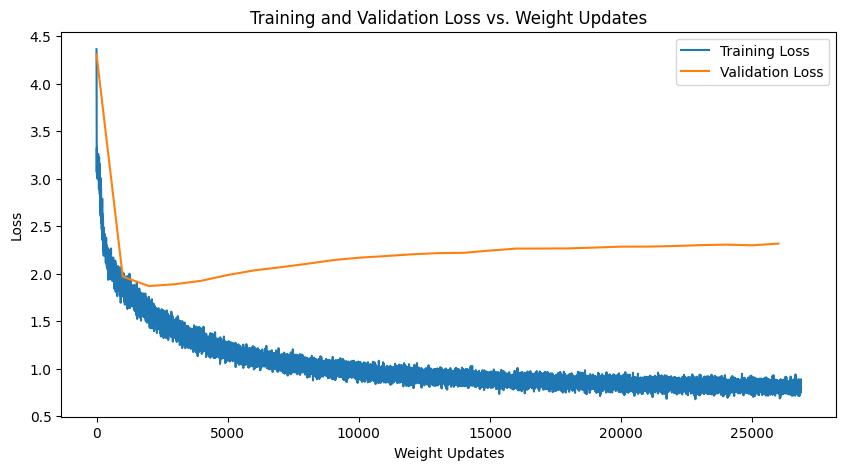

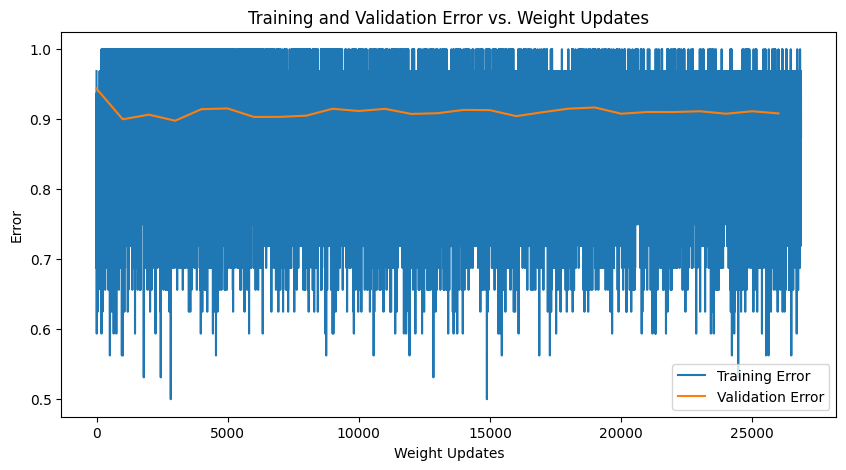

In [29]:
import matplotlib.pyplot as plt

# Calculate errors: error = 1 - accuracy
training_errors = [1 - acc for acc in training_accuracies]
validation_errors = [1 - acc for acc in validation_accuracies]

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(update_counts, training_losses, label='Training Loss')
plt.plot(range(0, len(validation_losses) * 1000, 1000), validation_losses, label='Validation Loss') 
plt.xlabel('Weight Updates')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Weight Updates')
plt.legend()

# Plot training and validation error
plt.figure(figsize=(10, 5))
plt.plot(update_counts, training_errors, label='Training Error')
plt.plot(range(0, len(validation_errors) * 1000, 1000), validation_errors, label='Validation Error')  
plt.xlabel('Weight Updates')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Weight Updates')
plt.legend()

plt.show()

In [ ]:
# Save the model
model_path = f'{dir_root}/char_rnn_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

In [ ]:
# Load the model
model = CharRNN(vocab_size, vocab_size, hidden_size).to(device)
model.load_state_dict(torch.load(model_path))
model.eval()
print("Model loaded successfully")

In [32]:
def generate_text(model, start_text, char_to_index, index_to_char, max_length=1000, temperature=1.0):
    model.eval()
    with torch.no_grad():
        hidden = model.init_hidden(1).to(device)
        hidden = repackage_hidden(hidden)
        input_seq = start_text
        generated_text = start_text

        for i in range(max_length):
            input_seq_encoded = torch.tensor([one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq], dtype=torch.float32).unsqueeze(0).to(device)
            output, hidden = model(input_seq_encoded, hidden)
            output_dist = output.data.view(-1).div(temperature).exp()
            top_char = torch.multinomial(output_dist, 1)[0]
            
            # Ensure the predicted index is within the valid range
            if top_char.item() in index_to_char:
                predicted_char = index_to_char[top_char.item()]
            else:
                predicted_char = ''  # Handle out-of-range index by skipping or using a placeholder

            generated_text += predicted_char
            input_seq = input_seq[1:] + predicted_char

    return generated_text

In [33]:
# Generate text using the trained model
start_text = 'I never shall forget that night.'
generated_text = generate_text(model, start_text, char_to_index, index_to_char, max_length=100, temperature=0.3)
print(generated_text)

I never shall forget that night.e
That when I sleep, thy picture’s sight with thy lucks for their raz


In [24]:
## Self-Attention-Based NN for the same task

In [ ]:
# Re-generation the dataset with sequence length 128
sequence_length = 128

if USE_ALL_BOOKS:
    input_seqs, target_seqs = generate_sequences(all_texts, char_to_index, sequence_length=sequence_length, stride=24)
    input_seqs = torch.tensor(input_seqs, dtype=torch.float32)
    target_seqs = torch.tensor(target_seqs, dtype=torch.long)
    
    input_seqs = input_seqs.to(device)
    target_seqs = target_seqs.to(device)
    
    dataset = TensorDataset(input_seqs, target_seqs)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    print("Input sequences shape:", input_seqs.shape)
    print("Target characters shape:", target_seqs.shape)
else:
    input_seqs, target_seqs = generate_sequences(text, char_to_index, sequence_length=sequence_length, stride=63)
    input_seqs = torch.tensor(input_seqs, dtype=torch.float32)
    target_seqs = torch.tensor(target_seqs, dtype=torch.long)
    
    input_seqs = input_seqs.to(device)
    target_seqs = target_seqs.to(device)
    
    dataset = TensorDataset(input_seqs, target_seqs)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    print("Input sequences shape:", input_seqs.shape)
    print("Target characters shape:", target_seqs.shape)



In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Transformer Model Definition
class TransformerModel(nn.Module):
    def __init__(self, ntokens, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=ninp, nhead=nhead, dim_feedforward=nhid, dropout=dropout),
            num_layers=nlayers
        )
        self.input_emb = nn.Embedding(ntokens, ninp)
        self.decoder = nn.Linear(ninp, ntokens)
        self.init_weights()
    
    def init_weights(self):
        initrange = 0.1
        nn.init.uniform_(self.input_emb.weight, -initrange, initrange)
        nn.init.zeros_(self.decoder.bias)
        nn.init.uniform_(self.decoder.weight, -initrange, initrange)

    def forward(self, src):
        src = self.input_emb(src) * np.sqrt(self.input_emb.embedding_dim)
        output = self.encoder(src)
        output = self.decoder(output)
        return output

# Prepare the dataset
def generate_sequences(text, char_to_index, sequence_length=128, stride=1):
    input_sequences = []
    target_characters = []

    for i in range(0, len(text) - sequence_length, stride):
        input_seq = text[i:i+sequence_length]
        target_char = text[i+sequence_length]
        input_seq_encoded = [char_to_index[c] for c in input_seq]
        input_sequences.append(input_seq_encoded)
        target_characters.append(char_to_index[target_char])

    return np.array(input_sequences), np.array(target_characters)

# Prepare data
sequence_length = 128
ntokens = len(char_to_index)

input_seqs, target_seqs = generate_sequences(text_list[0], char_to_index)
input_seqs = torch.tensor(input_seqs, dtype=torch.long)
target_seqs = torch.tensor(target_seqs, dtype=torch.long)

dataset = TensorDataset(input_seqs, target_seqs)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Model, Loss, Optimizer
model = TransformerModel(ntokens, 512, 8, 2048, 6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output.view(-1, ntokens), targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            output = model(inputs)
            loss = criterion(output.view(-1, ntokens), targets)
            total_loss += loss.item()
    return total_loss / len(val_loader)

# Training and evaluation
num_epochs = 10
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plotting
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Text Generation
def generate_text(model, start_text, char_to_index, index_to_char, max_length=1024):
    model.eval()
    with torch.no_grad():
        input_seq = torch.tensor([char_to_index[c] for c in start_text], dtype=torch.long).unsqueeze(0).to(device)
        generated_text = start_text

        for _ in range(max_length):
            output = model(input_seq)
            next_char_index = torch.argmax(output[:, -1, :]).item()
            next_char = index_to_char[next_char_index]
            generated_text += next_char
            input_seq = torch.cat((input_seq, torch.tensor([[next_char_index]], device=device)), dim=1)

    return generated_text

start_text = 'Once upon a time,'
generated_text = generate_text(model, start_text, char_to_index, index_to_char)
print(generated_text)